In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import ConfusionMatrixDisplay

## Author
Leann Kim & Anna Clarkson

### Date
April 2024

# Our Data

TikTok Data from Kaggle

We chose to explore data on TikTok video engagement due to the recent events surrounding the TikTok ban. If you haven't heard yet, President Biden recently signed the bill to force a sale of the video app by its owner, ByteDance, or ban it. 

## Exploratory Data Analysis

In [2]:
#Read in the csv file
tiktok = pd.read_csv('/Users/leannkim/Documents/Applied Machine Learning/Project/tiktok_dataset.csv')

In [3]:
#Display the first few rows
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


**Overview of Column Variables:**

**#**: unique ID for each video

**claim_status**: whether a video has been identified as an "opinion" or "claim." 

**video_id**: random identifying number assigned to the video when it was published on TikTok.

**video_duration_sec**: how long the video is, measured in seconds.

**video_transcription_text**: trascribed text of the words spoken in the published video.

**verified_status**: indicates whether the TikTok user who published the video is verified or not verified.

**author_ban_status**: indicates whether the TikTok user who publushed the videos is active, under scrutiny, or banned.

**video_view_count**: total number of times the video has been viewed.

**video_like_count**: total number of times the video has been liked.

**video_share_count**: total nummber of times the video has been shared.

**video_download_count**: total number of times the video has been downloaded.

**video_comment_count**: total number of comments on the video. 



In [4]:
#Data types for each column
tiktok.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [5]:
#Number of rows and columns
tiktok.shape

(19382, 12)

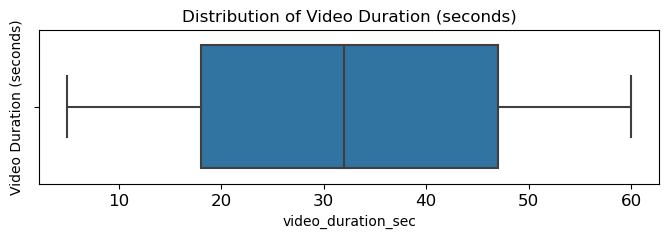

In [6]:
#Boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8,2))
plt.title('Distribution of Video Duration (seconds)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Video Duration (seconds)')
sns.boxplot(x=tiktok['video_duration_sec'])
plt.show()

The duration of videos range from 5 seconds to 60 seconds with no outliers. The majority of the videos are between 20 secs and 40 seconds, with the median being around 30 seconds.

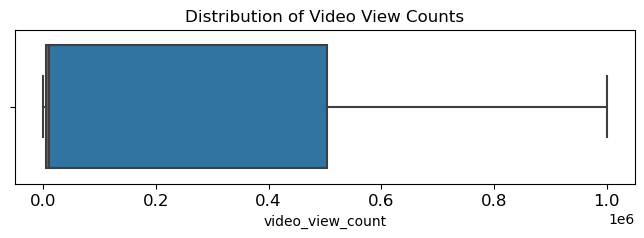

In [7]:
#Boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(8,2))
plt.title('Distribution of Video View Counts', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=tiktok['video_view_count'])
plt.show()

The view counts range from 0 to 1,000,000 views. The majority of the videos have a view count between 0 and 500,000 views. 

### Missing Data

In [8]:
#Where are the NA values?
tiktok.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
#Drop the NA rows
tiktok = tiktok.dropna(axis=0) 

In [10]:
#Number of rows and columns
tiktok.shape

(19084, 12)

In [11]:
#Basic info
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [12]:
#Are there duplicates?
tiktok.duplicated().sum()

0

## Feature Selection & Transformation 

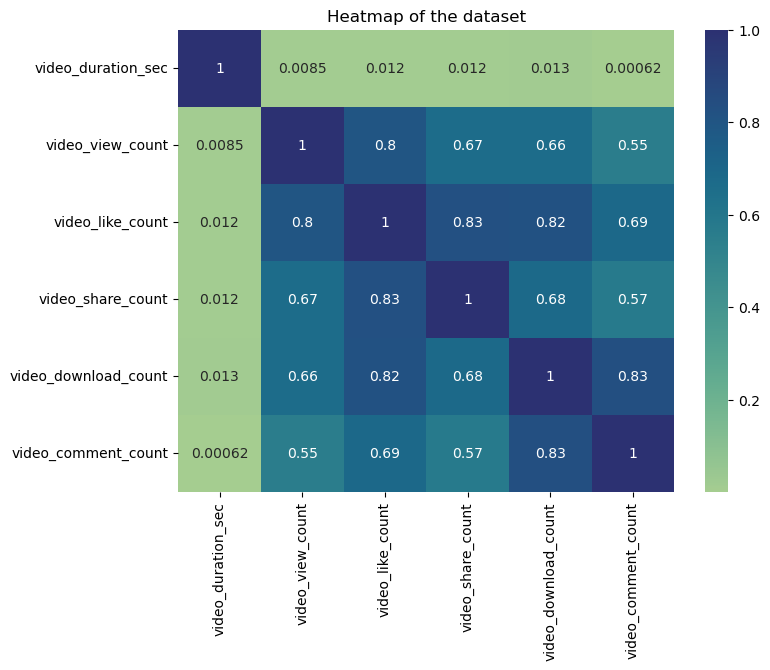

In [13]:
#Visualizing how correlated certain features are to each other
plt.figure(figsize=(8, 6))
sns.heatmap(
    tiktok[["video_duration_sec", "claim_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. 
To build a logistic regression model that meets this assumption, we are exluding video_like_count. And among the variables that quantify video metrics, we are keeping video_duration_sec, video_view_count, and video_comment_count as features.

In [14]:
#Select outcome variable
y = tiktok['verified_status']

#Select features/dependent variable
X = tiktok[['claim_status', 'video_duration_sec', 
            'video_view_count', 
            'video_comment_count', 'author_ban_status']]

In [15]:
tiktok["verified_status"].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [16]:
X.head()

,claim_status,video_duration_sec,video_view_count,video_comment_count,author_ban_status
0,claim,59,343296.0,0.0,under review
1,claim,32,140877.0,684.0,active
2,claim,31,902185.0,329.0,active
3,claim,25,437506.0,584.0,active
4,claim,19,56167.0,152.0,active


### Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
X_train.head()

,claim_status,video_duration_sec,video_view_count,video_comment_count,author_ban_status
8040,claim,34,816695.0,24.0,under review
18312,opinion,40,903.0,0.0,active
7349,claim,54,311925.0,2545.0,active
2856,claim,46,598217.0,448.0,active
16585,opinion,40,2660.0,0.0,under review


In [19]:
y_train.head()

8040     not verified
18312        verified
7349     not verified
2856     not verified
16585        verified
Name: verified_status, dtype: object

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 5), (4771, 5), (14313,), (4771,))

### Encoding X_train

In [21]:
X_train.dtypes

claim_status            object
video_duration_sec       int64
video_view_count       float64
video_comment_count    float64
author_ban_status       object
dtype: object

Out of the features we chose for X, claim_status and author_ban_status are object data types. The values of each feature are shown below.


In [22]:
X_train["claim_status"].unique()

array(['claim', 'opinion'], dtype=object)

In [23]:
X_train["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

 In order to work with the models, these features need to be a numeric data type. To change this, we will be using OneHot Encoder.

In [24]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
8040,claim,under review
18312,opinion,active
7349,claim,active
2856,claim,active
16585,opinion,under review


In [25]:
#Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

We ran into an issue where our testing and training data were different shapes when we included all the categories as columns (claim status claim, claim status opinion, author ban status active, etc).

To fit this to a logistic regression model down the line, we had to drop the first category in each feature (claim_status_claim and author_ban_status_active).

In [26]:
#Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [27]:
#Get feature names
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [28]:
#Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [29]:
#Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

#Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,1.0


In [30]:
#Display first few rows of `X_train` with the `claim_status` and 'author_ban_status' columns dropped 
#(since this feature is being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_comment_count
8040,34,816695.0,24.0
18312,40,903.0,0.0
7349,54,311925.0,2545.0
2856,46,598217.0,448.0
16585,40,2660.0,0.0


In [31]:
#Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,34,816695.0,24.0,0.0,0.0,1.0
1,40,903.0,0.0,1.0,0.0,0.0
2,54,311925.0,2545.0,0.0,0.0,0.0
3,46,598217.0,448.0,0.0,0.0,0.0
4,40,2660.0,0.0,1.0,0.0,1.0


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 5), (4771, 5), (14313,), (4771,))

### Encoding y_train

In [33]:
y_train.dtype

dtype('O')

In [34]:
y_train.unique()

array(['not verified', 'verified'], dtype=object)

As shown above, the outcome variable is of data type object. One-hot encoding can be used to make this variable numeric.

In [35]:
#Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop = 'first', sparse_output=False)

In [36]:
#Encode the training outcome variable
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

#Display the encoded training outcome variable
y_train_final

array([0., 1., 0., ..., 0., 0., 0.])

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 5), (4771, 5), (14313,), (4771,))

### Encoding X_test

In [38]:
#Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

X_test_to_encode.head()

,claim_status,author_ban_status
3695,claim,active
11495,opinion,under review
7604,claim,active
12728,opinion,active
875,claim,active


In [39]:
#Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [40]:
#Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [41]:
#Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_comment_count
3695,54,692084.0,312.0
11495,37,5164.0,1.0
7604,39,801951.0,2942.0
12728,44,6429.0,5.0
875,26,555780.0,91.0


In [42]:
#Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

#Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,54,692084.0,312.0,0.0,0.0,0.0
1,37,5164.0,1.0,1.0,0.0,1.0
2,39,801951.0,2942.0,0.0,0.0,0.0
3,44,6429.0,5.0,1.0,0.0,0.0
4,26,555780.0,91.0,0.0,0.0,0.0


### Encoding y_test

In [43]:
#Encode the testing outcome variable
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_final

array([0., 1., 0., ..., 0., 0., 1.])

In [44]:
#Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 5), (4771, 5), (14313,), (4771,))

## Logistic Regression

### High accuracy, but no true positives (recall)

In [45]:
#Construct a logistic regression model and fit it to the training set without class_weight
tiktok_model = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [46]:
#Use the logistic regression model to get predictions on the encoded testing set
y_pred = tiktok_model.predict(X_test_final)

In [47]:
accuracy = sum(y_pred == y_test_final) / len(y_test_final)
print("Accuracy:", accuracy)

Accuracy: 0.9377488996017607


Our model correctly predicted 94% of the samples in the test data. Exciting, but...

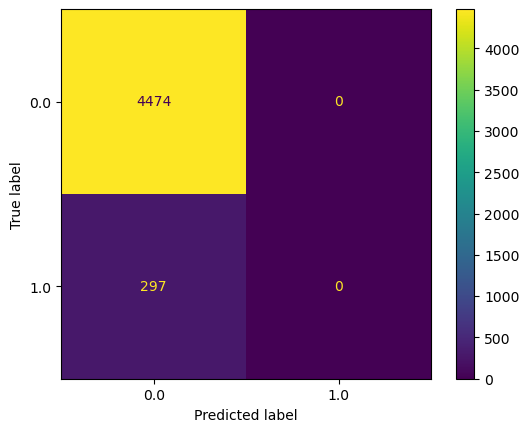

In [48]:
#To visualize the results of the regression model
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_final, y_pred), 
                       display_labels=tiktok_model.classes_).plot()

We can see that we didn't get any results in the false positive or true positive quadrant. We'll get into why this is the case in a little bit. First, let's talk about our results.

**Quadrants Explained**

The upper-left quadrant displays the number of **True Negatives**: the number of videos posted by unverified accounts that the model accurately classified as so. 

The upper-right quadrant displays the number of **False Positives**: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of **False Negatives**: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of **True Positives**: the number of videos posted by verified accounts that the model accurately classified as so.

**Results Explained**

The model accurately predicted that 4474 videos were posted by unverified accounts, but misclassified 297 videos as posted by unverified accounts. 

### Low accuracy, but high amount of true positives (recall)

In [49]:
#Construct a logistic regression model and fit it to the training set
tiktok_model = LogisticRegression(random_state=0, max_iter=800, class_weight='balanced').fit(X_train_final, y_train_final)

The only difference between our first logistic regression and this logistic regression, is the added class_weight parameter. By adding class_weight = 'balanced', it basically replicates the smaller category until we have as many samples as in the larger one. In our previous model, we didn't weigh the classes the same, resulting in the model disproportinately favoring one category (unverified accounts) over the other (verified accounts). 

In [50]:
#Use the logistic regression model to get predictions on the encoded testing set
y_pred = tiktok_model.predict(X_test_final)

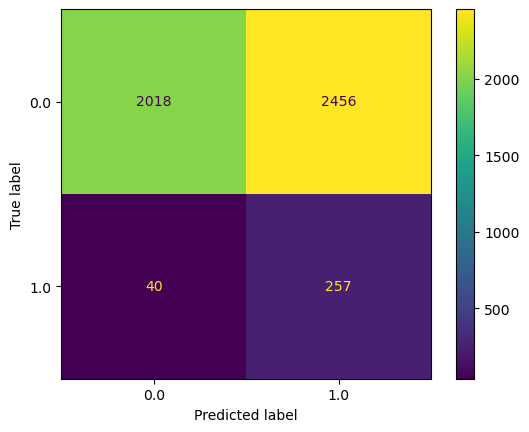

In [51]:
#To visualize the results of the regression model
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_final, y_pred), 
                       display_labels=tiktok_model.classes_).plot()

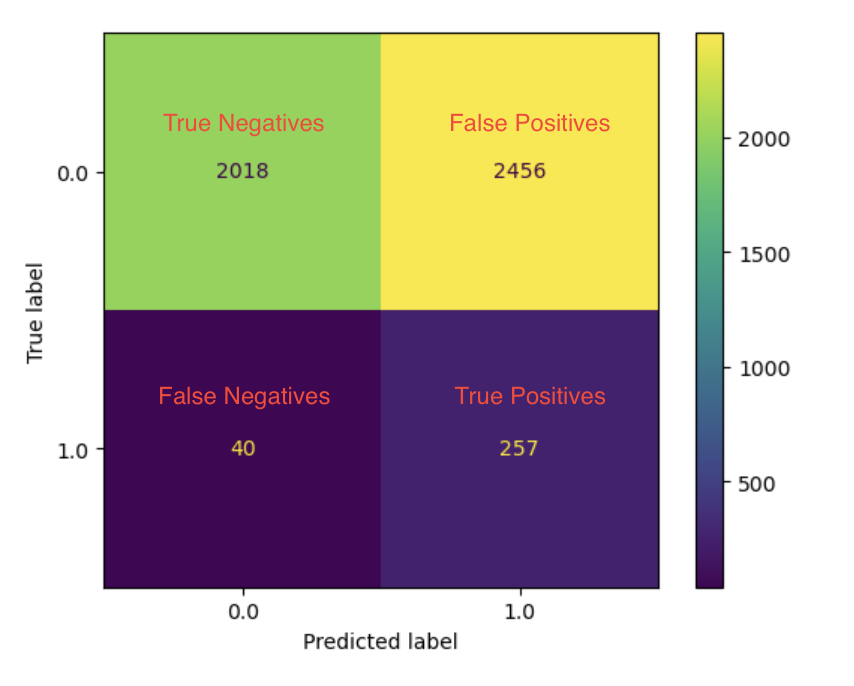

**Results Explained**

The model accurately predicted that 2018 videos were posted by unverified accounts, but misclassified 2456 videos as posted by unverified accounts.
The model accurately predicted that 257 videos were posted by verified accounts, but misclassified 40 videos as posted by verified accounts. 

We have results in the right upper and lower quadrants! But there's a tradeoff:

In [52]:
accuracy = sum(y_pred == y_test_final) / len(y_test_final)
print("Accuracy:", accuracy)

Accuracy: 0.4768392370572207


A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [53]:
from sklearn.metrics import classification_report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.98      0.45      0.62      4474
not verified       0.09      0.87      0.17       297

    accuracy                           0.48      4771
   macro avg       0.54      0.66      0.39      4771
weighted avg       0.93      0.48      0.59      4771



The classification report above shows that the logistic regression model achieved a precision of 9% and a recall of 87%, and it achieved an accuracy of 48%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

It's not the best model, but it's interesting to see the difference in how weighing the classes equally changes our model

### Model Coefficients

In [54]:
tiktok_model.coef_

array([[ 8.51416406e-03, -2.16415233e-06,  3.56954444e-05,
         3.65894011e-04, -1.80344414e-05, -5.88167344e-06]])

In [55]:
coefficients = pd.Series(tiktok_model.coef_[0],  tiktok_model.feature_names_in_)

In [56]:
coefficients

video_duration_sec                0.008514
video_view_count                 -0.000002
video_comment_count               0.000036
claim_status_opinion              0.000366
author_ban_status_banned         -0.000018
author_ban_status_under review   -0.000006
dtype: float64

In [57]:
interpet_model = pd.DataFrame(coefficients, columns = ['coefficient'])

In [58]:
interpet_model['odds ratio'] = np.exp(interpet_model['coefficient'])

In [59]:
interpet_model

,coefficient,odds ratio
video_duration_sec,0.008514,1.008551
video_view_count,-0.000002,0.999998
video_comment_count,0.000036,1.000036
claim_status_opinion,0.000366,1.000366
author_ban_status_banned,-0.000018,0.999982
author_ban_status_under review,-0.000006,0.999994


#### Coefficient Explanation:

The coefficient for video_duration_sec is 0.008. Since this coefficient is positive, it means that for every one unit increase in the variable (in seconds), the dependent variable (verified status) is expected to increase by about 0.008 units. In other words, there's a positive, albeit small, correlation between video_duration_sec and verified status.

An odds ratio of 1.008 means that the odds of a tiktok user being verified are 1.008 times as likely for each unit increase in the video_duration_sec



Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small. However, it's important to note that these coefficients are per second or count. These videos can have thousands of views or comments, and can range up to 10 minutes, so the coefficients can add up. 

# Principal Component Analysis

PCA doesn't fit with our data because it's a low dimensional dataset (less features than data points). However, we'll fiddle with it just for fun.

In [60]:
#Read in the csv file again
tiktok = pd.read_csv('/Users/leannkim/Documents/Applied Machine Learning/Project/tiktok_dataset.csv')

In [61]:
#Select outcome variable
y = tiktok['verified_status']

#Select feature/dependent variable
X = tiktok[['video_transcription_text']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [63]:
# CountVectorize video_transcription_text
vectorizer = CountVectorizer(max_df=0.90, min_df=20,
                                   max_features=200,
                                   stop_words='english')
video_text_enc = vectorizer.fit_transform(X_train['video_transcription_text'].values.astype('U'))
video_text_enc = pd.DataFrame(video_text_enc.toarray(), columns = vectorizer.get_feature_names_out(), 
                               index = X_train.index)

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
video_text_pca = pca.fit_transform(video_text_enc)

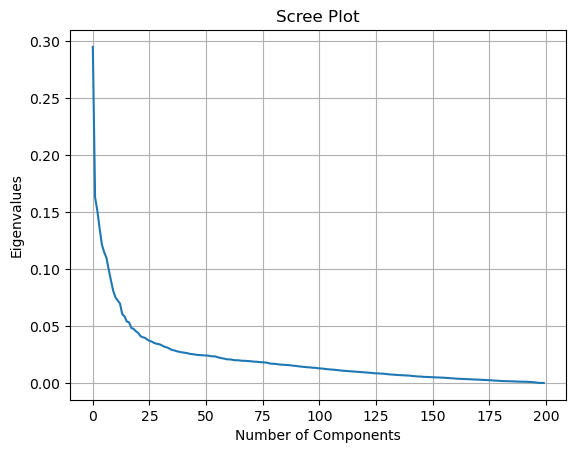

In [65]:
pca = PCA().fit(video_text_enc)
plt.plot(pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

There's a sharp drop in eigenvalues (amount of variation), which suggests that the first 20 or so components captured the most variance, and where it starts to level off indicates our cut off. Ideally, the principal components we would pick would have an eigenvalue of at least 1. Since we have too many PCs (more than 3), PCA is not the best way to visualize our data. 

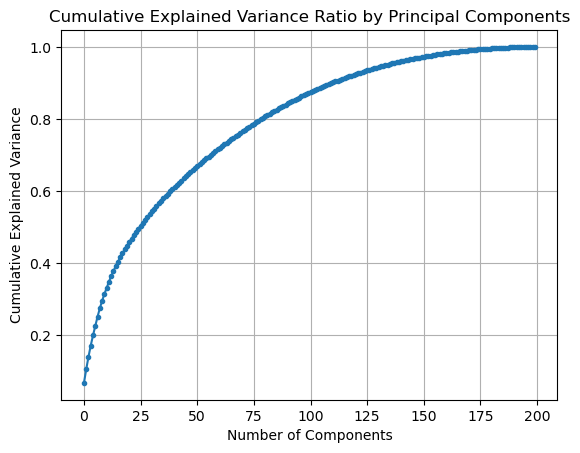

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

Each point on the graph represents the cumulative explained variance when considering a certain number of principal components. The fact that the points overlap so much suggests that the cumulative explained variance ratio is increasing evenly with each principal components. Again, PCA might not be the best way to visualize our data.

# K-Means

In [67]:
tiktok = pd.read_csv('/Users/leannkim/Documents/Applied Machine Learning/Project/tiktok_dataset.csv')

In [68]:
tiktok = tiktok.dropna(axis=0) 

In [69]:
X = tiktok[['claim_status', 'video_duration_sec', 
            'video_view_count', 
            'video_comment_count', 'author_ban_status']]

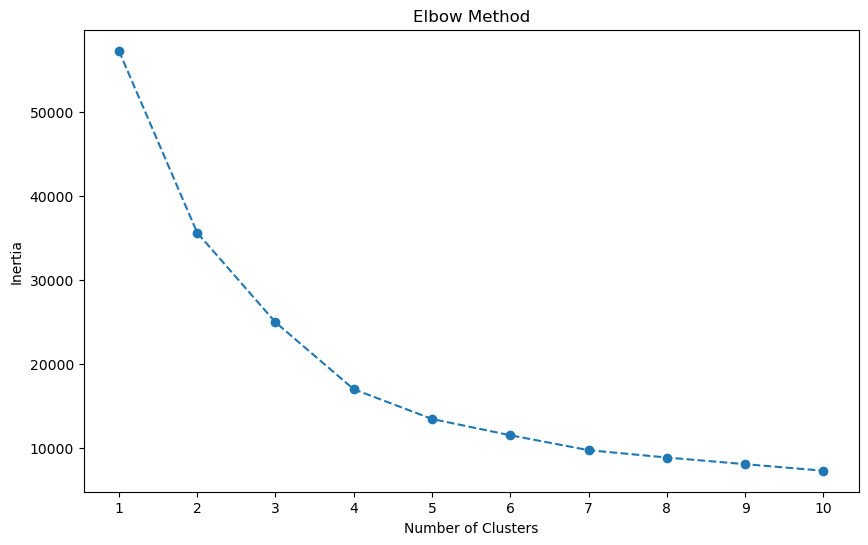

In [70]:
from sklearn.cluster import KMeans


# Select features for k-means clustering
X_cluster = X[['video_duration_sec', 'video_view_count', 'video_comment_count']]

# Standardize features to ensure features are on a similar sclae
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.show()

There's not a super obvious elbow, so we'll choose n_clusters=3

/var/folders/6l/2vf3wvr109928c56xkqs7m4h0000gn/T/ipykernel_12851/269279761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster.loc[:,'Cluster'] = cluster_labels


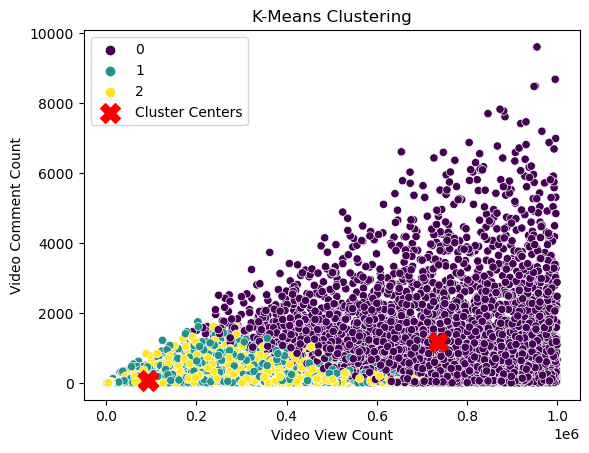

In [71]:
# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_cluster_scaled)
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
X_cluster.loc[:,'Cluster'] = cluster_labels

# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_cluster.columns[:-1])

# Scatter plot showing 2-dimensional perspective of clusters and cluster centers
sns.scatterplot(data=X_cluster, x='video_view_count', y='video_comment_count', hue='Cluster', palette='viridis')
plt.scatter(cluster_centers_df['video_view_count'], cluster_centers_df['video_comment_count'], marker='X', color='red', s=200, label='Cluster Centers')
plt.xlabel('Video View Count')
plt.ylabel('Video Comment Count')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In the scatter plot, each point represents a TikTok video, colored according to its assigned cluster. The red 'X' markers denote the cluster centers. This visualization helps in understanding the distribution of videos based on their view count and comment count, as well as the clustering pattern identified by k-means.

**Results Explained**

We can infer that videos with higher view counts correlate to higher comment counts. This clustering could help identify groups of videos with similar engagement patterns, which could be a valuable insight for content creators. 

# Areas of Further Research

 - Adding hyperparameters to further optimize our model
 - Choosing different features for k-means analysis
 - Fiddling with logistic regression parameters.